In [1]:
%matplotlib notebook

# Assignment 2

Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import the csv file
df = pd.read_csv('meteo.csv')
#sort the values from Date and Data value to get min and max aligned
df = df.sort_values(by=['Date', 'Data_Value'])
#set the date as index in order to use group by on it
df = df.set_index('Date')
#get the first and last value of a date
res = df.groupby(df.index).apply(lambda x: x.iloc[[0, -1]])
#drop the column created by the groupby and lambda function
res.index = res.index.droplevel(0)
#divide the temperature column by 10 to get the true value
res['Data_Value'] = res['Data_Value'] / 10

In [4]:
#reset index to be able to create some new columns
res = res.reset_index()

In [5]:
#create the columns date(day-month) and year
res['Year'] = res['Date'].apply(lambda x: x[:4])
res['Month_Day'] = res['Date'].apply(lambda x: x[5:])

In [6]:
#remove data from 29/02 as required in the assignement
res = res[res['Month_Day'] != '02-29']

In [7]:
#convert the year column to int
res['Year'] = res['Year'].astype(int)

In [8]:
#separate the values from 2005-2014
res_2005_2014 = res[res['Year'] < 2015]
#separate the values from 2015
res_2015 = res[res['Year'] == 2015]

In [9]:
#filter the data from 2004 to 2015
#sort the values
res_2005_2014 = res_2005_2014.sort_values(by = ['Month_Day', 'Year'])
#sort by data value to get the min and max by group by
res_2005_2014 = res_2005_2014.sort_values(by = ['Month_Day', 'Data_Value'])

In [10]:
#set_index to month and day values
res_2005_2014 = res_2005_2014.set_index('Month_Day')
#group by and get the first and last value from each date
res_2005_2014 = res_2005_2014.groupby(res_2005_2014.index).apply(lambda x: x.iloc[[0, -1]])

In [11]:
#remove the first column index created by group by
res_2005_2014.index = res_2005_2014.index.droplevel(0)

In [12]:
#retrieve min and max 
res_max_05_14 = res_2005_2014[res_2005_2014['Element'] == 'TMAX']
res_min_05_14 = res_2005_2014[res_2005_2014['Element'] == 'TMIN']
res_max_15 = res_2015[res_2015['Element'] == 'TMAX']
res_min_15 = res_2015[res_2015['Element'] == 'TMIN']

In [13]:
#create list with values 
val_max_05_14 = res_max_05_14['Data_Value'].to_numpy()
val_min_05_14 = res_min_05_14['Data_Value'].to_numpy()
val_max_15 = res_max_15['Data_Value'].to_numpy()
val_min_15 = res_min_15['Data_Value'].to_numpy()

<IPython.core.display.Javascript object>


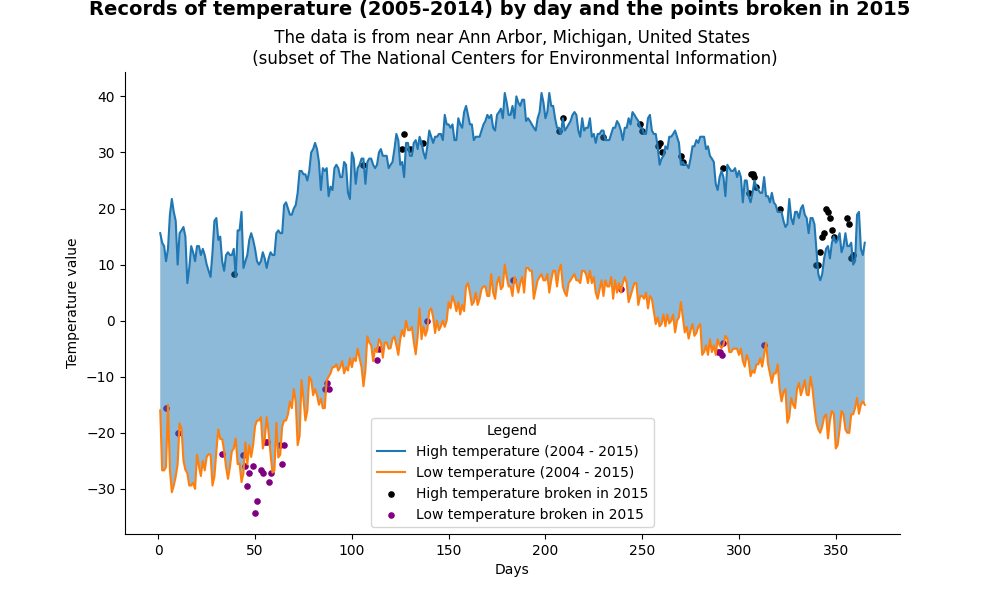

In [21]:
list_days = [x for x in range(1, 366)]
#create list to store the broken points
list_days_broken_high = []
list_days_broken_low = []
list_temp_broken_high = []
list_temp_broken_low = []
#start plotting
plt.figure(figsize=(10, 6))
#plot line for max and min values (2004-1015)
plt.plot(list_days, val_max_05_14, label = 'High temperature (2004 - 2015)')
plt.plot(list_days, val_min_05_14, label = 'Low temperature (2004 - 2015)')

#check the breaking points
for i in range(len(val_max_15)):
    #check high temp breaking points
    if val_max_15[i] > val_max_05_14[i]:
        list_days_broken_high.append(i)
        list_temp_broken_high.append(val_max_15[i])
        
    #check low temp breaking points
    if val_min_15[i] < val_min_05_14[i]:
        list_days_broken_low.append(i)
        list_temp_broken_low.append(val_min_15[i])

#add the breaking points to the graph
plt.scatter(list_days_broken_high, list_temp_broken_high, c = 'black', marker = 'o', s = 14, label = 'High temperature broken in 2015')
plt.scatter(list_days_broken_low, list_temp_broken_low, c = 'purple', marker = 'o', s = 14, label = 'Low temperature broken in 2015')
#fill the space between hign and low tempeatures
plt.gca().fill_between(range(1, len(val_max_05_14) + 1), val_max_05_14, val_min_05_14, alpha = 0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Labelling
plt.xlabel('Days')
plt.ylabel('Temperature value')
plt.suptitle('Records of temperature (2005-2014) by day and the points broken in 2015', y =1, fontsize=14, fontweight='bold')
plt.title('\n \n The data is from near Ann Arbor, Michigan, United States \n (subset of The National Centers for Environmental Information)' )
plt.legend(loc = 8, frameon = True, title = 'Legend')
#save file
plt.savefig('image.jpeg')